In [221]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
data = pd.read_csv('../Data/02_Clean.csv')

109018.6051966799


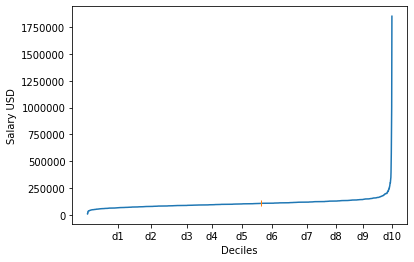

In [222]:
labels = ["d1", "d2","d3", "d4","d5", "d6","d7", "d8","d9", "d10"]
salaryMean = data.SalaryUSD.mean()
salarySort = data.SalaryUSD.sort_values()
salarySort = salarySort.values
salaryDecile = pd.qcut(salarySort, 10, labels=labels)
deciles = salaryDecile.value_counts()

xMean = -1
for i, x in enumerate(salarySort) :
    if x < salaryMean :
        xMean = i

newDeciles = []
save = 0
for x in deciles :
    save += x
    newDeciles.append(save)

salaryPlot = sns.lineplot(data=salarySort)
salaryPlot.set_xticks(newDeciles)
salaryPlot.set_xticklabels(labels)
salaryPlot.set_ylabel("Salary USD")
salaryPlot.set_xlabel("Deciles")
salaryPlot.ticklabel_format(style='plain', axis="y")
salaryPlot.plot(xMean, salaryMean, marker='|')
print(salaryMean)

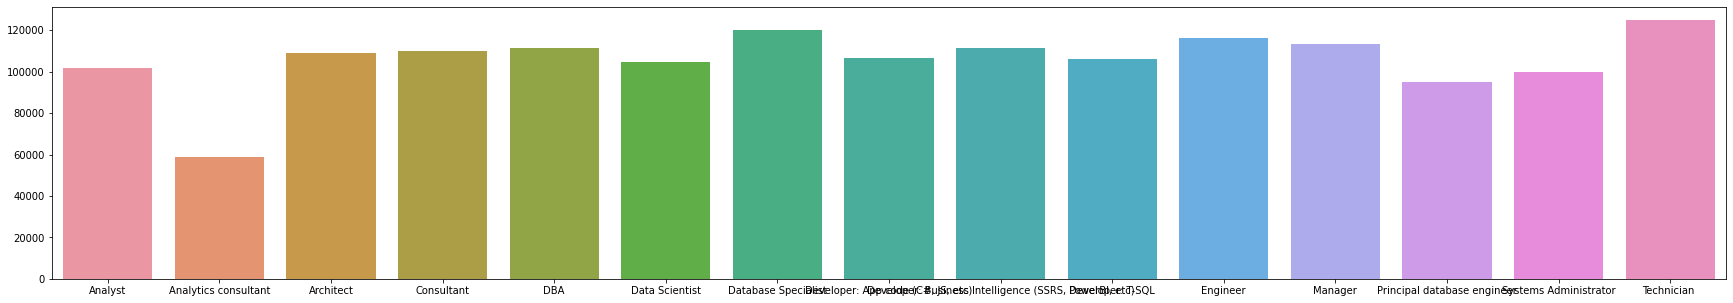

In [252]:
salaryJobs = data[["SalaryUSD", "JobTitle"]]
groupSJ = salaryJobs.groupby("JobTitle")
salaryMeanByJobs = {}
for x in groupSJ :
    salaryMeanByJobs[x[0]] = x[1].SalaryUSD.mean()

keys = list(salaryMeanByJobs.keys())
values = list(salaryMeanByJobs.values())
salaryJobPlot = sns.barplot(x=keys, y=values)
salaryJobPlot.figure.set_size_inches(30,5)